In [ ]:
!pip install datasets

In [ ]:
from huggingface_hub import list_datasets

all_dataset = list(list_datasets())
print(f"total number of datasets: {len(all_dataset)}")
print(f"first 10 datasets: {all_dataset[:10]}")

HfHubHTTPError: 502 Server Error: Bad Gateway for url: https://huggingface.co/api/datasets?sort=trendingScore&cursor=eyIkb3IiOlt7InRyZW5kaW5nU2NvcmUiOjAsIl9pZCI6eyIkZ3QiOiI2NmU4ODg3MmRjOTk4OGM4YjVmZTkzNTMifX0seyJ0cmVuZGluZ1Njb3JlIjp7IiRsdCI6MH19LHsidHJlbmRpbmdTY29yZSI6bnVsbH1dfQ%3D%3D

In [ ]:
!pip install -U datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 19.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; pl

In [ ]:
from datasets import load_dataset

emotions = load_dataset("emotion")
print(emotions)

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [ ]:
train_ds = emotions["train"]
train_ds

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
len(train_ds)

16000

In [ ]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

In [ ]:
train_ds[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [ ]:
train_ds[0]["text"]

'i didnt feel humiliated'

In [ ]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

# What if my dataset is not on the hub

In [ ]:
dataset_url = "https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt"
!wget {dataset_url}

--2025-05-17 15:53:57--  https://huggingface.co/datasets/transformersbook/emotion-train-split/raw/main/train.txt
Resolving huggingface.co (huggingface.co)... 108.138.246.71, 108.138.246.67, 108.138.246.85, ...
Connecting to huggingface.co (huggingface.co)|108.138.246.71|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658616 (1.6M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   1.58M  7.06MB/s    in 0.2s    

2025-05-17 15:53:58 (7.06 MB/s) - ‘train.txt’ saved [1658616/1658616]



In [ ]:
!head -n 1 train.txt

i didnt feel humiliated;sadness


In [ ]:
!head -n 3 train.txt

i didnt feel humiliated;sadness
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness
im grabbing a minute to post i feel greedy wrong;anger


In [ ]:
emotions_local = load_dataset('csv', data_files = 'train.txt', sep = ';', names = ['text', 'label'])

Generating train split: 0 examples [00:00, ? examples/s]

# From datasets to DataFrames

In [ ]:
import pandas as pd

emotions.set_format(type = 'pandas')
df = emotions['train'][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
def label_int2str(row):
  return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


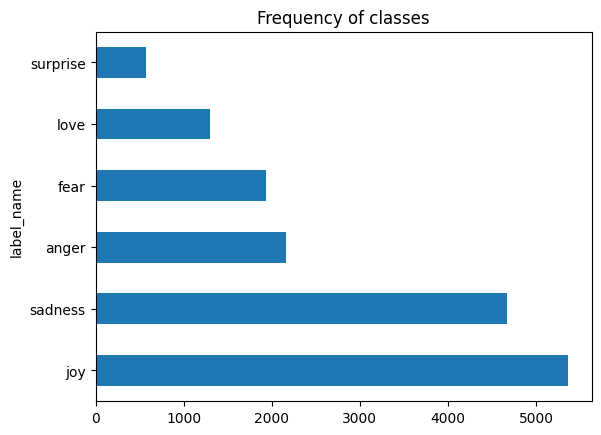

In [ ]:
import matplotlib.pyplot as plt

df['label_name'].value_counts().plot.barh()
plt.title('Frequency of classes')
plt.show()

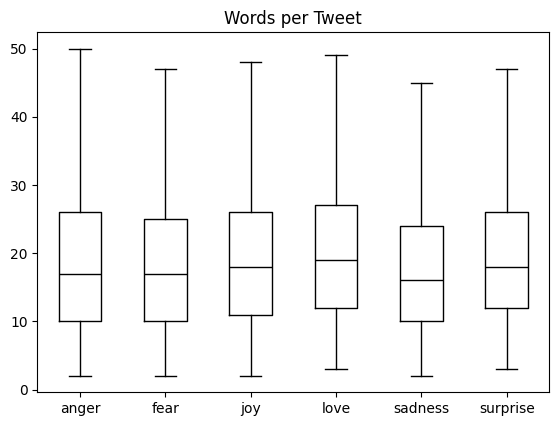

In [ ]:
df['Words per Tweet'] = df['text'].str.split().apply(len)
df.boxplot('Words per Tweet', by='label_name', grid=False, showfliers=False, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

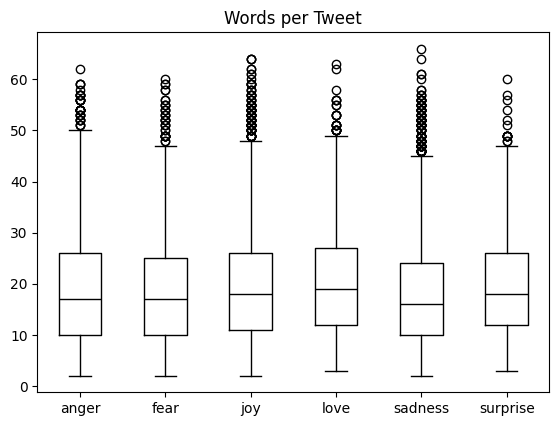

In [ ]:
df['Words per Tweet'] = df['text'].str.split().apply(len)
df.boxplot('Words per Tweet', by='label_name', grid=False, showfliers=True, color='black')
plt.suptitle('')
plt.xlabel('')
plt.show()

In [ ]:
df.head()

,text,label,label_name,Words per Tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4


In [ ]:
emotions.reset_format()

# Character Tokenization

In [ ]:
text = 'Just a random text for the sake of purpose'
tokenized_text = list(text)
print(tokenized_text)

['J', 'u', 's', 't', ' ', 'a', ' ', 'r', 'a', 'n', 'd', 'o', 'm', ' ', 't', 'e', 'x', 't', ' ', 'f', 'o', 'r', ' ', 't', 'h', 'e', ' ', 's', 'a', 'k', 'e', ' ', 'o', 'f', ' ', 'p', 'u', 'r', 'p', 'o', 's', 'e']


In [ ]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
token2idx

{' ': 0,
 'J': 1,
 'a': 2,
 'd': 3,
 'e': 4,
 'f': 5,
 'h': 6,
 'k': 7,
 'm': 8,
 'n': 9,
 'o': 10,
 'p': 11,
 'r': 12,
 's': 13,
 't': 14,
 'u': 15,
 'x': 16}

In [ ]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[1, 15, 13, 14, 0, 2, 0, 12, 2, 9, 3, 10, 8, 0, 14, 4, 16, 14, 0, 5, 10, 12, 0, 14, 6, 4, 0, 13, 2, 7, 4, 0, 10, 5, 0, 11, 15, 12, 11, 10, 13, 4]


In [ ]:
import tensorflow as tf

input_ids = tf.constant(input_ids)
one_hot_encodings = tf.one_hot(input_ids, len(token2idx))
print(one_hot_encodings.shape)

(42, 17)


In [ ]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: J
Tensor index: 1
One-hot: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
one_hot_encodings

<tf.Tensor: shape=(42, 17), dtype=float32, numpy=
array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0.,

# Word Tokenization

In [ ]:
tokenized_texts = text.split()

In [ ]:
tokenized_texts

['Just', 'a', 'random', 'text', 'for', 'the', 'sake', 'of', 'purpose']

# Subword Tokenization

In [ ]:
from transformers import AutoTokenizer

model_ckpt = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

In [ ]:
# Same but more specific
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

In [ ]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 2074, 1037, 6721, 3793, 2005, 1996, 8739, 1997, 3800, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'just', 'a', 'random', 'text', 'for', 'the', 'sake', 'of', 'purpose', '[SEP]']


In [ ]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] just a random text for the sake of purpose [SEP]


In [ ]:
tokenizer.vocab_size

30522

In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

# Tokenizing the Whole Dataset

In [ ]:
def tokenize(batch):
  return tokenizer(batch['text'], padding=True, truncation=True)

In [ ]:
print(tokenize(emotions['train'][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [ ]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# python has map
# huggingface datasets also has map
# batch_size = None, max length sentence has no padding, all data is sent

# Transformers as feature extractors

In [ ]:
# TF for tensorflow in huggingface -->
# cuda -- GPU

In [ ]:
from transformers import AutoModel
import torch

model_ckpt = 'distilbert-base-uncased'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AutoModel.from_pretrained(model_ckpt).to(device)

In [ ]:
text = 'this is a text'
inputs = tokenizer(text, return_tensors = 'pt')
print(inputs)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3793,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}


In [ ]:
inputs = {k: v.to(device) for k, v in inputs.items()}
with torch.no_grad():
  outputs = model(**inputs)

print(outputs.last_hidden_state.size())

torch.Size([1, 6, 768])


In [ ]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3793,  102]], device='cuda:0')), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0'))])

In [ ]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3793,  102]], device='cuda:0'),
 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}

In [ ]:
tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

['[CLS]', 'this', 'is', 'a', 'text', '[SEP]']

In [ ]:
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.2535, -0.1091,  0.0759,  ..., -0.1054,  0.2257,  0.4615],
         [-0.7154, -0.2742, -0.0954,  ..., -0.3597,  0.5174,  0.3450],
         [-0.4100, -0.2195,  0.1850,  ..., -0.0136,  0.1607,  1.0422],
         [-0.2523, -0.0254,  0.2472,  ..., -0.1637,  0.0865,  1.0516],
         [-0.0570, -0.1057,  0.0662,  ...,  0.0584,  0.1034,  0.2971],
         [ 0.9184,  0.1577, -0.4105,  ...,  0.1509, -0.7327, -0.1572]]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [ ]:
outputs.last_hidden_state[:, 0].shape

torch.Size([1, 768])

In [ ]:
def extract_hidden_states(batch):
  inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return {'hidden_states': last_hidden_state[:, 0].cpu().numpy()}


In [ ]:
emotions_encoded.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

In [ ]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched = True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [ ]:
# trying error
def extract_hidden_states_2(batch):
  inputs = {k: v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  return last_hidden_state[:, 0].cpu().numpy()

emotions_hidden = emotions_encoded.map(extract_hidden_states_2, batched = True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

TypeError: Provided `function` which is applied to all elements of table returns a variable of type <class 'numpy.ndarray'>. Make sure provided `function` returns a variable of type `dict` (or a pyarrow table) to update the dataset or `None` if you are only interested in side effects.

In [ ]:
emotions_hidden

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_states'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_states'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask', 'hidden_states'],
        num_rows: 2000
    })
})

In [ ]:
emotions_hidden['train'][0]

{'label': tensor(0),
 'input_ids': tensor([  101,  1045,  2134,  2102,  2514, 26608,   102,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]),
 'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0

In [ ]:
import numpy as np

X_train = np.array(emotions_hidden['train']['hidden_states'])
X_valid = np.array(emotions_hidden['validation']['hidden_states'])
y_train = np.array(emotions_hidden['train']['label'])
y_valid = np.array(emotions_hidden['validation']['label'])

# Visualizing the training data

In [ ]:
import matplotlib.pyplot as plt
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X_train)
mapper = UMAP(n_components=2, metric='cosine').fit(X_scaled)
df_emb = pd.DataFrame(mapper.embedding_, columns = ['X', 'Y'])
df_emb['label'] = y_train
df_emb.head()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,X,Y,label
0,4.374795,3.172645,0
1,-3.085868,3.683641,0
2,5.411768,6.744473,3
3,-2.437143,5.947467,2
4,-3.431017,5.756499,3


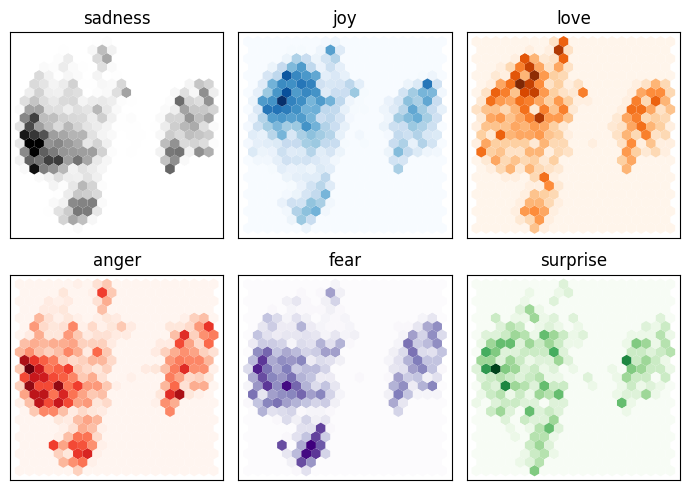

In [ ]:
# umap
fig, ax = plt.subplots(2, 3, figsize=(7, 5))
ax = ax.flatten()
cmaps = ['Greys', 'Blues', 'Oranges', 'Reds', 'Purples', 'Greens']
labels = emotions['train'].features['label']
for i, (label, cmap) in enumerate(zip(labels.names, cmaps)):
  df_emb_sub = df_emb.query(f'label == {i}')
  ax[i].hexbin(df_emb_sub['X'], df_emb_sub['Y'], cmap = cmap,
               gridsize=20, linewidths = (0, ))
  ax[i].set_title(label)
  ax[i].set_xticks([]), ax[i].set_yticks([])

plt.tight_layout()
plt.show()

# Training a simple classifier

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(max_iter = 3000)
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [ ]:
lr_clf.score(X_valid, y_valid)

0.634

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy = 'most_frequent')
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

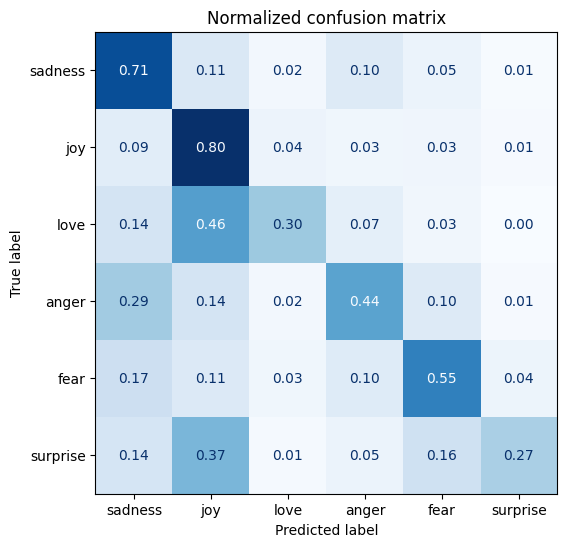

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize='true')
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap='Blues', values_format='.2f', ax=ax, colorbar=False)
  plt.title('Normalized confusion matrix')
  plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels.names)

# Fine-Tuning Transformers

In [ ]:
from transformers import AutoModelForSequenceClassification

model_skpt = 'distilbert-base-uncased'
num_labels = 6
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels).to(device)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average = 'weighted')
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1}

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
from transformers import TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded['train']) // batch_size
model_name = f'{model_ckpt}-finetuned-emotion'
training_args = TrainingArguments(
    output_dir = model_name,
    num_train_epochs = 2,
    learning_rate = 2e-5,
    per_device_train_batch_size = batch_size,
    per_device_eval_batch_size = batch_size,
    weight_decay = 0.01,
    eval_strategy = 'epoch',
    disable_tqdm = False,
    logging_steps = logging_steps,
    push_to_hub = True,
    log_level = 'error'
)

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model = model,
    args = training_args,
    compute_metrics = compute_metrics,
    train_dataset = emotions_encoded['train'],
    eval_dataset = emotions_encoded['validation'],
    tokenizer = tokenizer
)

trainer.train()

In [ ]:
preds_output = trainer.predict(emotions_encoded['validation'])

In [ ]:
preds_output

In [ ]:
preds_output.metrics

In [ ]:
y_preds = np.argmax(preds_output.predictions, axis = 1)

In [ ]:
plot_confusion_matrix(y_preds, y_valid, labels.names)

# Fine-tuning with Keras

In [ ]:
from transformers import TFAutoModelForSequenceClassification

tf_model = (TFAutoModelForSequenceClassification.from_pretrained(model_ckpt, num_labels = num_labels))

In [ ]:
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded['train'].to_tf_dataset(
    columns = tokenizer_columns, label_cols = ['label'], shuffle = True,
    batch_size = batch_size)
tf_eval_dataset = emotions_encoded['validation'].to_tf_dataset(
    columns = tokenizer_columns, label_cols = ['label'], shuffle = False,
    batch_size = batch_size)

In [ ]:
import tensorflow as tf

tf_model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 5e-5),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = tf.metrics.SparseCategoricalAccuracy())

tf_model.fit(tf_train_dataset, validation_data = tf_eval_dataset, epochs = 2)

# Error Analysis

In [ ]:
from torch.nn.functional import cross_entropy

def forward_pass_with_labels(batch):
    inputs = {k:v.to(device) for k, v in batch.items() if k in tokenizer.model_input_names}
    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis = -1)
        loss = cross_entropy(output.logits, batch['label'].to(device),
                             reduction = 'none')
        return {'loss': loss.cpu().numpy(),
                'predicted_label': pred_label.cpu().numpy()}

In [ ]:
emotions_encoded.set_format('torch', columns = ['input_ids', 'attention_mask', 'label'])

emotions_encoded['validation'] = emotions_encoded['validation'].map(
    forward_pass_with_labels, batched = True, batch_size = 16
)

In [ ]:
emotions_encoded.set_format('torch', columns = ['input_ids', 'attention_mask', 'label'])

emotions_encoded['validation'] = emotions_encoded['validation'].map(
    forward_pass_with_labels, batched = True, batch_size = 16
)

In [ ]:
emotions_encoded.set_format('pandas')
cols = ['text', 'label', 'predicted_label', 'loss']
df_test = emotions_encoded['validation'][:][cols]
df_test['label'] = df_test['label'].apply(label_int2str)
df_test['predicted_label'] = df_test['predicted_label'].apply(label_int2str)

In [ ]:
df_test.sort_values('loss', ascending = False)['text'].iloc[5]

In [ ]:
df_test.sort_values('loss', ascending = False).head(10)

# Saving and Sharing a model

In [ ]:
trainer.push_to_hub(commit_message = 'Training completed!')

In [ ]:
from transformers import pipeline

model_id = 'neyvre/distilbert-base-uncased-finetuned-emotion'
classifier = pipeline('text-classification', model = model_id)

In [ ]:
tweet = 'it was such a great movie, i loved the actors'
preds = classifier(tweet, top_k = 6)
preds

In [ ]:
preds_df = pd.DataFrame(preds)
preds_df_sorted = preds_df.sort_values('label', ascending = True)
plt.bar(labels.names, 100 * preds_df_sorted['score'])
plt.title(f'"{tweet}"')
plt.ylabel('Prediction probability (%)')
plt.show()